<a href="https://colab.research.google.com/github/Sparshtiwarist/CTREA-Dynamics/blob/main/CapstoneProject(Timeseries_and_Forecasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stt
import plotly
import plotly.express as pltx
import warnings
from scipy.stats import zscore
#!pip install missingno
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Capstone/outliers_removed.csv')

<ipython-input-3-33866f16d0c4>:1: DtypeWarning: Columns (8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/drive/MyDrive/Capstone/outliers_removed.csv')


In [4]:
df.shape

(897081, 16)

In [5]:
df.head()

,Unnamed: 0,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Number,Word
0,0,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Number', 'Word'],
      dtype='object')

In [7]:
forecasting_data = df[['Date Recorded','Sale Amount']].sort_values(by = 'Date Recorded')
forecasting_data.head()

,Date Recorded,Sale Amount
81744,01/01/2002,140000.0
102324,01/01/2002,135000.0
92010,01/01/2002,126500.0
90305,01/01/2002,178000.0
96361,01/01/2002,119900.0


In [8]:


# Print existing column names
print("Existing column names:", forecasting_data.columns)

# Convert 'Date Recorded' column to datetime format
if 'Date Recorded' in df.columns:
    forecasting_data['Date Recorded'] = pd.to_datetime(forecasting_data['Date Recorded'])

    # Change the date format to a different one
    forecasting_data['Formatted Date'] = forecasting_data['Date Recorded'].dt.strftime('%d-%m-%Y')  # Change to day-month-year format

    # Display the DataFrame with the new formatted date column
    print(forecasting_data)
else:
    print("'Date Recorded' column not found in the DataFrame.")

Existing column names: Index(['Date Recorded', 'Sale Amount'], dtype='object')
       Date Recorded  Sale Amount Formatted Date
81744     2002-01-01     140000.0     01-01-2002
102324    2002-01-01     135000.0     01-01-2002
92010     2002-01-01     126500.0     01-01-2002
90305     2002-01-01     178000.0     01-01-2002
96361     2002-01-01     119900.0     01-01-2002
...              ...          ...            ...
49215     2020-12-31    1700000.0     31-12-2020
44414     2020-12-31     530000.0     31-12-2020
49339     2020-12-31     140000.0     31-12-2020
9412      2020-12-31    1367500.0     31-12-2020
13581     2020-12-31     201400.0     31-12-2020

[897081 rows x 3 columns]


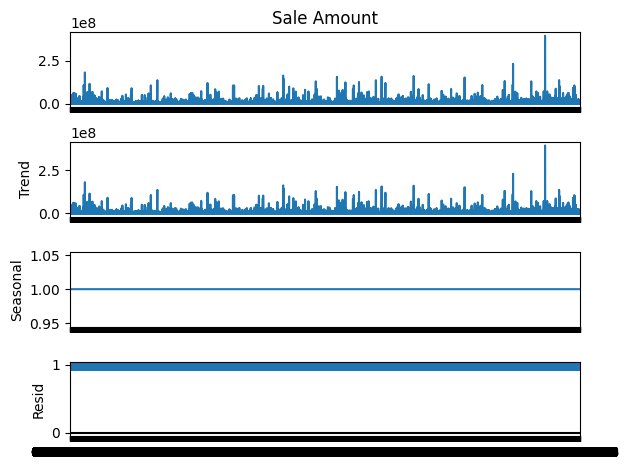

In [9]:
# Set 'Date Recorded' as the index
forecasting_data.set_index('Formatted Date', inplace=True)

# Perform time series decomposition (optional)
result = seasonal_decompose(forecasting_data['Sale Amount'], model='multiplicative', period=1)
result.plot()
plt.show()

# Split data into train and test sets
train_size = int(len(forecasting_data) * 0.8)
train, test = forecasting_data.iloc[:train_size], forecasting_data.iloc[train_size:]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/t

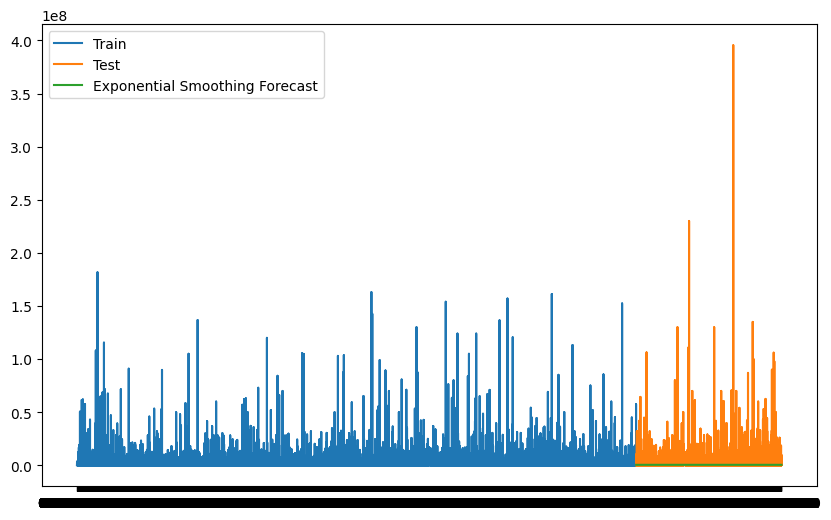

In [10]:
# Perform forecasting using Simple Exponential Smoothing
model = SimpleExpSmoothing(train['Sale Amount'])
fitted_model = model.fit()
forecast = fitted_model.forecast(len(test))

# Plotting forecast vs. actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sale Amount'], label='Train')
plt.plot(test.index, test['Sale Amount'], label='Test')
plt.plot(test.index, forecast, label='Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [11]:
#lumen Code
forecasting_data.drop('Date Recorded', inplace=True, axis=1)

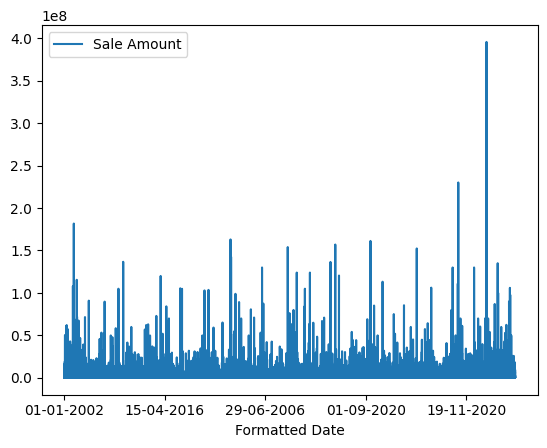

In [12]:
forecasting_data.plot()
plt.show()

In [13]:
forecasting_data.shape[0]

897081

In [14]:
moving_avg=forecasting_data.rolling(3).mean()
moving_avg

,Sale Amount
Formatted Date,
01-01-2002,NaN
01-01-2002,NaN
01-01-2002,133833.333333
01-01-2002,146500.000000
01-01-2002,141466.666667
...,...
31-12-2020,914966.666667
31-12-2020,796966.666667
31-12-2020,790000.000000


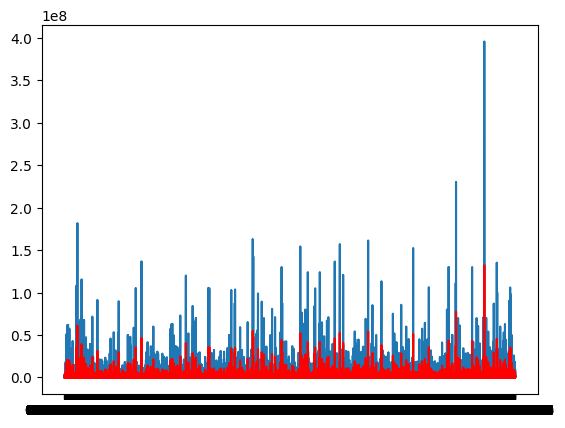

In [15]:
plt.plot(forecasting_data)
plt.plot(moving_avg, color='red')

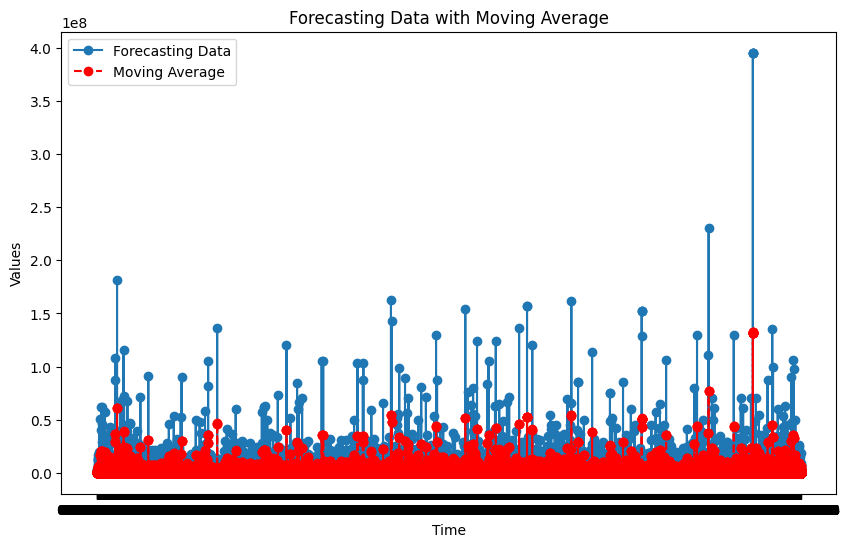

In [16]:
# Plotting the forecasting data and moving average
plt.figure(figsize=(10, 6))
plt.plot(forecasting_data, label='Forecasting Data', marker='o')
plt.plot(moving_avg, color='red', label='Moving Average', linestyle='dashed', marker='o')
plt.title('Forecasting Data with Moving Average')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [21]:
# Assuming 'original_data' is your actual time series data
original_data = [290000, 310000, 300000, 320000, 330000]


In [24]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [32]:
# Fit ARIMA model using pmdarima
model = auto_arima(original_data, seasonal=False, suppress_warnings=True)
model.fit(original_data)

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [33]:
# Forecast future values
forecast, conf_int = model.predict(n_periods=5, return_conf_int=True)

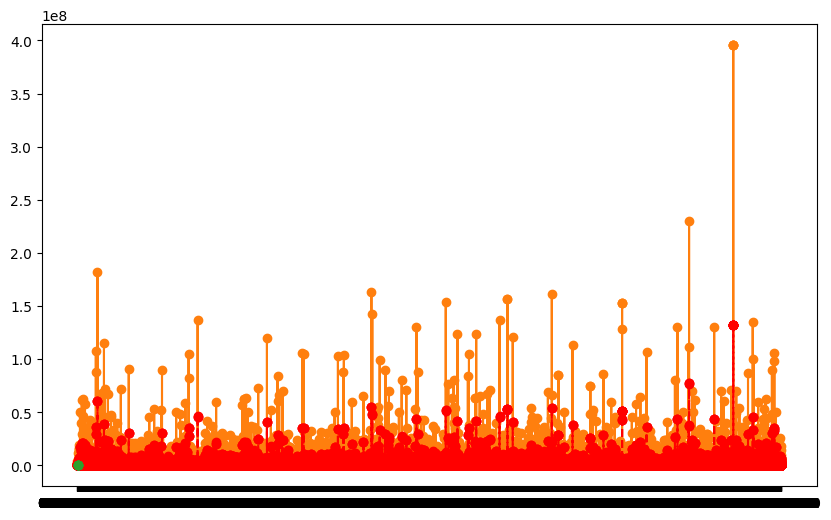

In [34]:
# Plotting the original data, ARIMA forecast, and moving average
plt.figure(figsize=(10, 6))
plt.plot(original_data, label='Original Data', marker='o', linestyle='dashed')
plt.plot(forecasting_data, label='Forecasting Data', marker='o')
plt.plot(moving_avg, color='red', label='Moving Average', linestyle='dashed', marker='o')
plt.plot(range(len(original_data), len(original_data) + len(forecast)), forecast, label='ARIMA Forecast', marker='o')

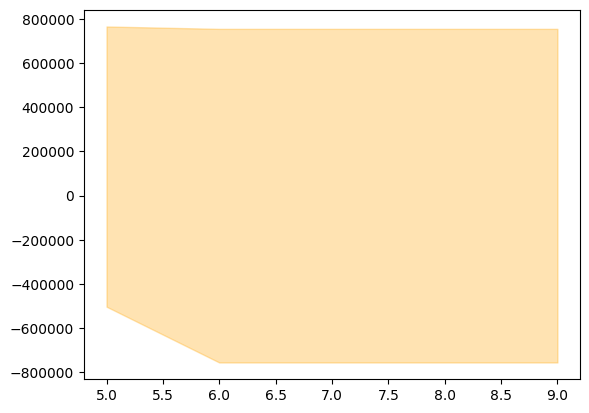

In [35]:
# Highlight confidence interval
plt.fill_between(range(len(original_data), len(original_data) + len(forecast)),
                 conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.3, label='95% Confidence Interval')

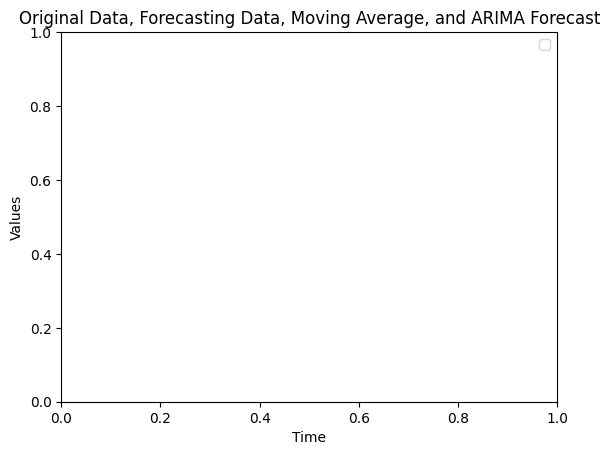

In [36]:
plt.title('Original Data, Forecasting Data, Moving Average, and ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting some options for pandas
pd.options.display.max_rows = 300
pd.options.display.max_columns = 500

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Capstone/outliers_removed.csv')

<ipython-input-18-33866f16d0c4>:1: DtypeWarning: Columns (8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/drive/MyDrive/Capstone/outliers_removed.csv')


In [ ]:
display(df)

,Unnamed: 0,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Number,Word
0,0,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897076,997208,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,14.0,Foreclosure
897077,997209,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN,25.0,Other
897078,997210,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN,NaN,NaN
897079,997211,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.head())
print(df.shape)

   Unnamed: 0  List Year Date Recorded     Town                Address  \
0           0       2020    09/13/2021  Ansonia        230 WAKELEE AVE   
1           1       2020    10/02/2020  Ashford        390 TURNPIKE RD   
2           2       2020    03/09/2021     Avon       5 CHESTNUT DRIVE   
3           3       2020    04/13/2021     Avon  111 NORTHINGTON DRIVE   
4           4       2020    07/02/2021     Avon     70 FAR HILLS DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        150500.0     325000.0       0.4630    Commercial              NaN   
1        253000.0     430000.0       0.5883   Residential    Single Family   
2        130400.0     179900.0       0.7248   Residential            Condo   
3        619290.0     890000.0       0.6958   Residential    Single Family   
4        862330.0    1447500.0       0.5957   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks Location  Number Word  
0          NaN    

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,897081.0,492995.193336,2.909811e+05,0.000000,240404.00,482275.000000,749328.000000,9.972120e+05
List Year,897081.0,2010.152041,6.321615e+00,2001.000000,2004.00,2010.000000,2016.000000,2.020000e+03
Assessed Value,897081.0,234248.535223,7.519528e+05,70.000000,89510.00,140410.000000,226900.000000,1.428587e+08
Sale Amount,897081.0,402346.688346,1.610326e+06,300.000000,158000.00,240000.000000,380000.000000,3.955000e+08
Sales Ratio,897081.0,0.615816,2.079207e-01,0.038847,0.48,0.605742,0.733185,1.233120e+00
Number,193670.0,13.769603,8.383166e+00,1.000000,7.00,14.000000,25.000000,8.800000e+01


In [ ]:
print( 'Missing values in outliers_removed:\n')
print(df.isnull().sum())

Missing values in outliers_removed:

Unnamed: 0               0
List Year                0
Date Recorded            0
Town                     0
Address                 14
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       342502
Residential Type    347092
Non Use Code        703411
Assessor Remarks    785599
OPM remarks         888500
Location            717778
Number              703411
Word                754671
dtype: int64


In [ ]:
# change date datatype from object to Datetime
df["Month"] = pd.to_datetime(df["Sale Amount"])

In [ ]:
df["Sale Amount"].head(15)

0      325000.0
1      430000.0
2      179900.0
3      890000.0
4     1447500.0
5     1250000.0
6      677500.0
7      795000.0
8      335000.0
9      352000.0
10     250000.0
11     700000.0
12     650000.0
13     249900.0
14     155000.0
Name: Sale Amount, dtype: float64

In [ ]:
# Resetting the index
df.set_index('Sale Amount', inplace=True)
df.head()

,Unnamed: 0,List Year,Date Recorded,Town,Address,Assessed Value,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Number,Word,Month
Sale Amount,,,,,,,,,,,,,,,,
325000.0,0,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000325000
430000.0,1,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000430000
179900.0,2,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000179900
890000.0,3,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000890000
1447500.0,4,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.001447500
